In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'f6f537de83784ff598bbf6f8d7bc5237'
secret = 'cf96af9e5ccd42399f8a11f58c7a873b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
popularity = []
track_id = []
duration_ms = []
key = []
time_signature = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []

      

In [4]:
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 6.237795335000001


In [5]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94


In [6]:
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 1.7780293279999988


In [7]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (1000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,0.2560,https://api.spotify.com/v1/audio-analysis/02kD...,0.799,195429,0.660,02kDW379Yfd5PzW5A6vuGt,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,https://api.spotify.com/v1/tracks/02kDW379Yfd5...,audio_features,spotify:track:02kDW379Yfd5PzW5A6vuGt,0.471


In [8]:
full_df = df_tracks.join(df_audio_features)

In [9]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,id,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,...,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,...,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,...,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,...,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94,0.2560,https://api.spotify.com/v1/audio-analysis/02kD...,0.799,195429,0.660,02kDW379Yfd5PzW5A6vuGt,...,0.1110,-6.153,0,0.0790,140.040,4,https://api.spotify.com/v1/tracks/02kDW379Yfd5...,audio_features,spotify:track:02kDW379Yfd5PzW5A6vuGt,0.471


In [10]:
full_df['time_signature'].nunique()

4

In [11]:
full_df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'acousticness',
       'analysis_url', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'track_href', 'type', 'uri',
       'valence'],
      dtype='object')

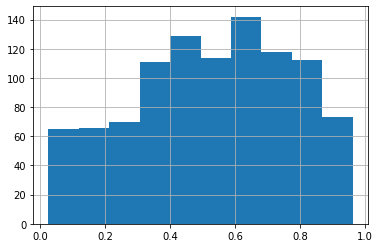

In [12]:
full_df['valence'].hist()

In [13]:
full_df = full_df.drop(['analysis_url','track_href','uri','id'],axis=1)

In [14]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,0.700,140526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,audio_features,0.756
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,0.935,187541,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,audio_features,0.357
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,0.823,190476,0.586,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,audio_features,0.347
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,0.761,261493,0.518,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,audio_features,0.522
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94,0.2560,0.799,195429,0.660,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,audio_features,0.471


In [15]:
full_df['key'].value_counts()

1     155
0     112
6     111
5      96
8      81
7      80
10     77
11     76
9      72
4      69
2      59
3      12
Name: key, dtype: int64

In [16]:
full_df['feature_artist/songname'] = full_df['track_name']

In [17]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence,feature_artist/songname
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,0.700,140526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,audio_features,0.756,Mood (feat. iann dior)
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,0.935,187541,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,audio_features,0.357,WAP (feat. Megan Thee Stallion)
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,0.823,190476,0.586,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,audio_features,0.347,For The Night (feat. Lil Baby & DaBaby)
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,0.761,261493,0.518,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,audio_features,0.522,Laugh Now Cry Later (feat. Lil Durk)
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94,0.2560,0.799,195429,0.660,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,audio_features,0.471,Lemonade


In [18]:
time_pop = full_df.groupby(['time_signature']).agg({'popularity':'mean'}).reset_index()

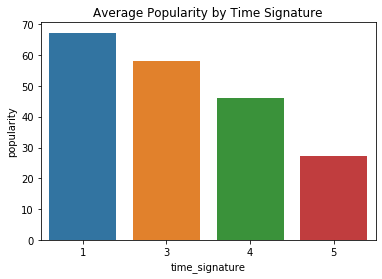

In [19]:
sns.barplot(x=time_pop['time_signature'],y=time_pop['popularity']);
plt.title('Average Popularity by Time Signature');

In [20]:
time_pop_sum = full_df.groupby(['time_signature']).agg({'popularity':'sum'}).reset_index()

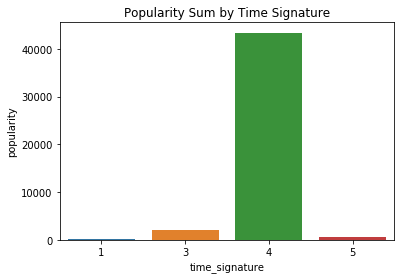

In [21]:
sns.barplot(x=time_pop_sum['time_signature'],y=time_pop_sum['popularity']);
plt.title('Popularity Sum by Time Signature');

In [47]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence,feature_artist/songname
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,0.700,140526,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,audio_features,0.756,Mood (feat. iann dior)
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,0.935,187541,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,audio_features,0.357,WAP (feat. Megan Thee Stallion)
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,0.823,190476,0.586,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,audio_features,0.347,For The Night (feat. Lil Baby & DaBaby)
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,0.761,261493,0.518,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,audio_features,0.522,Laugh Now Cry Later (feat. Lil Durk)
4,Internet Money,Lemonade,02kDW379Yfd5PzW5A6vuGt,94,0.2560,0.799,195429,0.660,0.000000,1,0.1110,-6.153,0,0.0790,140.040,4,audio_features,0.471,Lemonade


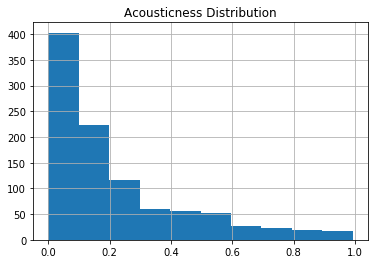

In [39]:
full_df['acousticness'].hist()
plt.title('Acousticness Distribution');

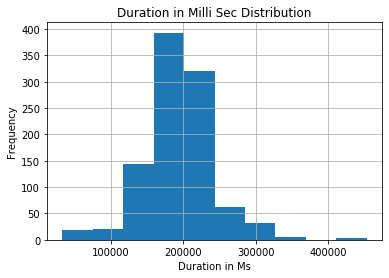

In [53]:
full_df['duration_ms'].hist()
plt.title('Duration in Milli Sec Distribution')
plt.xlabel('Duration in Ms')
plt.ylabel('Frequency');

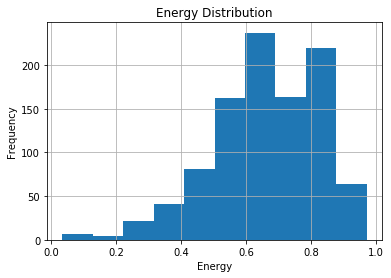

In [54]:
full_df['energy'].hist()
plt.title('Energy Distribution');
plt.xlabel('Energy')
plt.ylabel('Frequency');

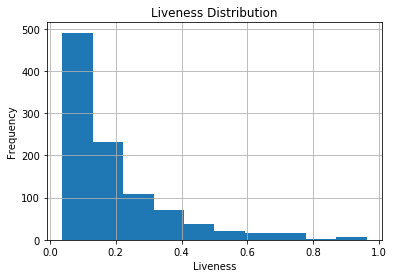

In [55]:
full_df['liveness'].hist()
plt.title('Liveness Distribution');
plt.xlabel('Liveness')
plt.ylabel('Frequency');

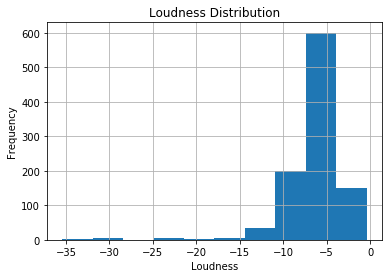

In [56]:
full_df['loudness'].hist()
plt.title('Loudness Distribution');
plt.xlabel('Loudness')
plt.ylabel('Frequency');

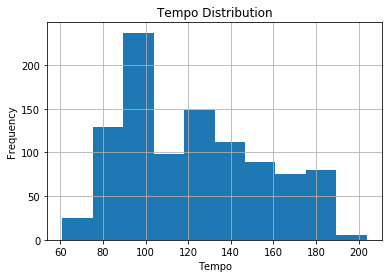

In [57]:
full_df['tempo'].hist()
plt.title('Tempo Distribution');
plt.xlabel('Tempo')
plt.ylabel('Frequency');

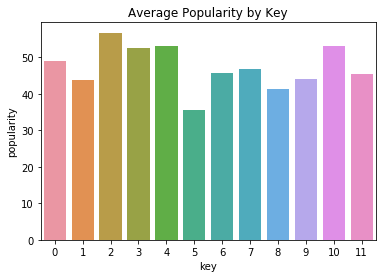

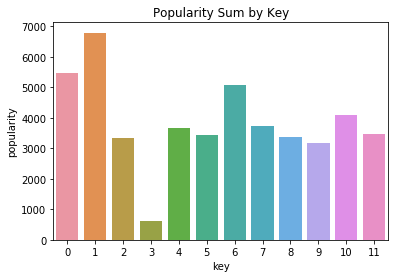

In [25]:
sns.barplot(x=key_pop_sum['key'],y=key_pop_sum['popularity']);
plt.title('Popularity Sum by Key');

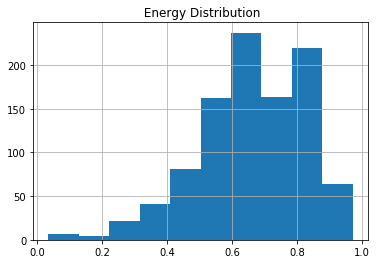

In [27]:
df_audio_features['energy'].hist()
plt.title(' Energy Distribution');

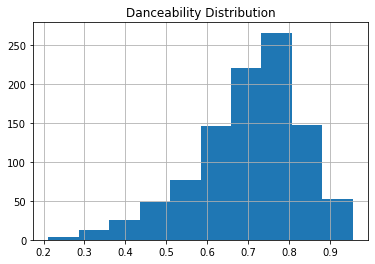

In [28]:
df_audio_features['danceability'].hist()
plt.title('Danceability Distribution');

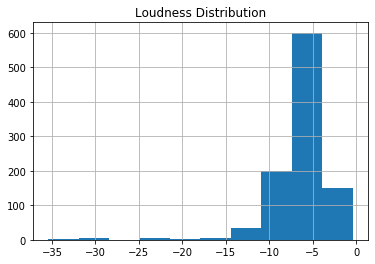

In [29]:
df_audio_features['loudness'].hist()
plt.title('Loudness Distribution');

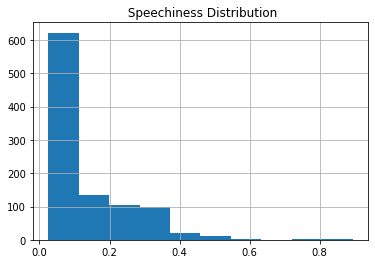

In [30]:
df_audio_features['speechiness'].hist()
plt.title(' Speechiness Distribution');

In [ ]:
key_pop = full_df.groupby(['key']).agg({'popularity':'mean'}).reset_index()

In [ ]:
sns.barplot(x=key_pop['key'],y=key_pop['popularity']);
plt.title('Average Popularity by Key');

In [ ]:
key_pop_sum = full_df.groupby(['key']).agg({'popularity':'sum'}).reset_index()